# 5.5 Refrigeration cycle: R134a

Consider a refrigration cycle using R134-a as the working fluid. The refrigerant absorbs heat at $-20^{\circ}  C$ during the evaporation process, then enters the compressor as a saturated vapor. In the compressor, R134a is pressurized until its temperature increases to $120^{\circ}  C$. The refrigerant is then cooled down to saturated liquid at  $40^{\circ}  C$ in a condenser. The refrigerant is then throttled to $-20^{\circ}  C$ before the evaporator. 

Determine: 

a) specific enthalpy of the refrigerant entering the throttling valve

b) specific enthalpy, quality and pressure of the refrigerant exiting the throttling valve

c) specific enthalpy and pressure at compressor inlet

d) specific enthalpy at compressor outlet

e) how much heat is absorbed in the evaporator per unit mass of the refrigerant

f) how much heat is rejected in the condenser per unit mass of the refrigerant

g) how much work is required by the compressor to elevate $1\:kg$ of the refrigerant's pressure; what is the coefficient of performance (COP)?

h) the polytropic constant assuming a polytropic process in the compressor

i) verify the first law of thermodynamics for the system as a whoole

j) draw the process on a P-h diagram developed previously for Q4 at this chapter

![Q5.png](CH5-Q5.png)

# Solution Approach for a)

The refrigerant entering the throttling valve comes from the condenser; therefore the state 3 enthalpy is desired. The temperature at this state is given as $T_3=40^{\circ}  C$ and the refrigerant is at its satuarated liquid state with quality equal to $x=0$.


In [13]:
# import the libraries we'll need
import CoolProp.CoolProp as CP

# define variables

fluid = "R134A"  # define the fluid or material of interest
T_3 = 40 + 273.15 #state #3 temperature in K
h_3 = CP.PropsSI("H", "T", T_3, "Q", 0, fluid)/1000  # enthalpy of the refrigerant at state #3 in kJ/kg
print('Th specific enthalpy of the refrigerant at state #3 is:', f"{h_3:.1f}", 'kJ/kg')

Th specific enthalpy of the refrigerant at state #3 is: 256.4 kJ/kg


# Solution Approach for b)
A throttling valve is ideally assumed to conserve enthalpy considering the first law of thermodynamics. Therefore,

$h_3 = h_4$

The refrigerant enters the evaporator as a saturated liquid at $-20^{\circ}  C$, therefore

$h_4 = h_{f@-20^{\circ}  C}+xh_{fg@-20^{\circ}  C}$

$x = (h_4 - h_{f@-20^{\circ}  C}) / h_{fg@-20^{\circ}  C}$

The pressure at the throttling valve exit remains the same as that of the evaporator inlet, which is the saturation pressure at the evaporator's operating temperature since the refrigerant enters the evaporator as a saturated liquid.

$P_4 = P_{sat@-20^{\circ}  C}$

In [14]:
h_4 = h_3   #constant enthalpy through a throttling valve

T_4 = -20 + 273.15   #temperature of refrigerant at state #4 in K
h_gN20 = CP.PropsSI("H", "T", T_4, "Q", 1, fluid)/1000   #enthalpy of sat vap at -20C in kJ/kg
h_fN20 = CP.PropsSI("H", "T", T_4, "Q", 0, fluid)/1000   #enthalpy of sat lig at -20C in kJ/kg
h_fgN20 = h_gN20 - h_fN20   #h_fg at -20C in kJ/kg
x = (h_4 - h_fN20)/h_fgN20  #qaulity of refrigerant entering the evaporator

P_4 = CP.PropsSI("P", "T", T_4, "Q", x, fluid)  # pressure of the refrigerant at state #1 in Pa

print('The specific enthalpy of the refrigerant at state #4 is:', f"{h_4:.1f}", 'kJ/kg')
print('The quality of the refrigerant at state #4 is:', f"{x:.3f}")
print('The pressure of the refrigerant at state #4 is:', f"{P_4:.1f}", 'Pa')

The specific enthalpy of the refrigerant at state #4 is: 256.4 kJ/kg
The quality of the refrigerant at state #4 is: 0.389
The pressure of the refrigerant at state #4 is: 132735.0 Pa


# Solution Approach for c)

The refrigerant enters the compressor as saturated vapor, therefore it has gone through constant pressure(and temperature) heating in the evaporator whose temperature is $-20^{\circ}  C$. So,

$h_1 = h_{g@-20^{\circ} C} $

$P_1=P_{sat@-20^{\circ}  C}$

In [4]:
T_1 = T_4 #temperature at state #1 in K
h_1 = CP.PropsSI("H", "T", T_1, "Q", 1, fluid)/1000  # enthalpy of the refrigerant at state #1 in kJ/kg
P_1 = CP.PropsSI("P", "T", T_1, "Q", 1, fluid)  # pressure of the refrigerant at state #1 in Pa
print('Th specific enthalpy of the refrigerant at state #1 is:', f"{h_1:.1f}", 'kJ/kg')
print('Th pressure of the refrigerant at state #1 is:', f"{P_1:.1f}", 'Pa')

Th specific enthalpy of the refrigerant at state #1 is: 386.6 kJ/kg
Th pressure of the refrigerant at state #1 is: 132735.0 Pa


# Solution Approach for d)

The refrigerant is heated to $T_2=120^{\circ}  C$. The pressure to which the refrigerant is pressurized to, however, is unknown. The condenser is assumed to be operating at constant pressure. The pressure at its outlet is the same as the inlet, which is also the compressor outlet pressure. The pressure at the outlet is calculated based on the refrigerant being in a saturation state at $40^{\circ}  C$.

$P_2=P_3$

$P_3=P_{satR134a@40^{\circ}C}$

The pressure and temperature at the compressor outlet are then used to calculate the specific enthalpy at this state.

In [5]:
T_2 = 120 + 273.15 #temperature at state #2 in K
P_3 = CP.PropsSI("P", "T", T_3, "Q", 0, fluid)  # pressure of the refrigerant at state #3 in Pa
P_2 = P_3 # pressure of the refrigerant at state #2 in Pa
h_2 = CP.PropsSI("H", "T", T_2, "P", P_2, fluid)/1000  # enthalpy of the refrigerant at state #2 in kJ/kg
print('The specific of the refrigerant at state #2 is:', f"{h_2:.1f}", 'kJ/kg')

The specific of the refrigerant at state #2 is: 504.1 kJ/kg


# Solution Approach for e)

Consider the first law of thermodynamics for the evaporator,

$q_c=h_1-h_4$

In [6]:
q_c = h_1 - h_4
print(f"{q_c:.1f}", 'kJ of heat is absorbed by the refrigerant in the evaporator per kg of refrigerant')

130.1 kJ of heat is absorbed by the refrigerant in the evaporator per kg of refrigerant


# Solution Approach for f)

Consider the first law of thermodynamics for the condenser,

$q_h=h_2-h_3$

In [7]:
q_h = h_2 - h_3
print(f"{q_h:.1f}", 'kJ of heat is rejected to the environment in the condenser per kg of refrigerant')

247.6 kJ of heat is rejected to the environment in the condenser per kg of refrigerant


# Solution Approach for g)

Consider the first law of thermodynamics for the compressor,

$w=h_2-h_1$

$COP=q_c/w$

In [8]:
w = h_2 - h_1
cop = q_c / w
print(f"{w:.1f}", 'kJ of energy is required to compress 1kg of R134-a to the desired pressure')
print('The COP of the cycle is:', f"{cop:.1f}")

117.5 kJ of energy is required to compress 1kg of R134-a to the desired pressure
The COP of the cycle is: 1.1


# Solution Approach for h)

In a polytropic process,

$Pv^k=constant$

$P_1v_1^k=P_2v_2^k$

$P_1/P_2=(v_2/v_1)^k$

$d (density)=1/v$

$P_1/P_2=(d_1/d_2)^k$

$log(P_1/P_2)=k\:log(d_1/d_2)$

$k=log(P_1/P_2)/log(d_1/d_2)$

In [9]:
#importing required libraries
import numpy as np

#evaluating density 
d_1 = CP.PropsSI("D", "T", T_1, "Q", 1, fluid)  # density of the refrigerant at state #1 in kg/m3 based on sat vepor
d_2 = CP.PropsSI("D", "T", T_2, "P", P_2, fluid)  # density of the refrigerant at state #2 in kg/m3 based on sat vepor
k = np.log(P_1/P_2)/np.log(d_1/d_2)
print('Th polytropic constant for the compression process is:', f"{k:.3f}")

Th polytropic constant for the compression process is: 1.254


# Solution Approach for i)

Consider the first law of thermodynamics for the whole system,

$w=q_h-q_c$

In [10]:
w_test =  q_h - q_c
w_test == w #w_test is the value calculated from the first law and w is the value calculated using enthalpies

True

# Solution Approach for j)

Except for the compression process, all other processes follow straight lines of constant pressure or constant enthalpy. The curve for compression process is built based on a polytropic process and thermodynamic properties obtained from CoolProp.

from h)

$P/P_1=(d/d_1)^k$

$P=P1\:(d/d_1)^k$

values of $P$ and $d$ are generic pressure and density values for a polytropic process.

then an array of densities ranging from $d_1$ to $d_2$ is used to calculate pressure and enthalpy accordingly.

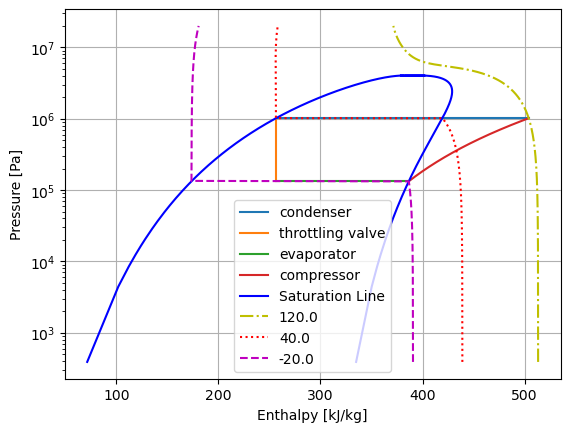

In [15]:
# import the libraries we'll need
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt

#for the compression process 1-2
#building an array of densities
e = 1000   #number of data points for the polytropic process
d_12 = np.linspace(d_1, d_2, e)  # define an array of values from d_1 to d_2
P_12 = P_1 * (d_12/d_1) ** k   #array of pressure based on density for the polytropic compression
h_12 = np.zeros(e)   #an empty array to store enthalpy values

for i in range(e):
   h_12[i] = CP.PropsSI("H", "P", P_12[i], "D", d_12[i], fluid)/1000  # enthalpy values for the polytropic process in kJ/kg

#for the condensing process at constant pressure
P_23 = np.linspace(P_2, P_3, 1000)  # define an array of pressure values from 2 to 3
h_23 = np.linspace(h_2, h_3, 1000)  # define a linear array of enthalpy values from 2 to 3

#for the process through the throttling valve at constant enthalpy
P_34 = np.linspace(P_3, P_4, 1000)  # define an array of pressure values from 3 to 4
h_34 = np.linspace(h_3, h_4, 1000)  # define a linear array of enthalpy values from 3 to 4

#for the condensing process at constant pressure
P_41 = np.linspace(P_4, P_1, 1000)  # define an array of pressure values from 4 to 1
h_41 = np.linspace(h_4, h_1, 1000)  # define a linear array of enthalpy values from 4 to 1

#plotting the process on the P-h diagram
plt.plot(h_23, P_23, "-", label="condenser")
plt.plot(h_34, P_34, "-", label="throttling valve")
plt.plot(h_41, P_41, "-", label="evaporator")
plt.plot(h_12, P_12, "-", label="compressor")
plt.legend()


#building the P-h diagram


# define variables
fluid = "R134A"  # define the fluid or material of interest, for full list see CP.Fluidslist()
T_min = CP.PropsSI("Tmin", fluid)  # triple-point temp for the fluid
P_min = CP.PropsSI("P", "T", T_min, "Q", 0, fluid)  # triple-point pressure for the fluid
P_max = 4.03E+6 #approximate critical pressure

P_vals = np.linspace(P_min, P_max, 1000)  # define an array of values from P_min to P_max
Q = 1  # define the fluid quality as 1, which is 100% vapor

enthalpy = [CP.PropsSI("H", "P", P, "Q", Q, fluid)/1000 for P in P_vals]  # call for enthalpy values using CoolProp

plt.plot(enthalpy, P_vals, "-b", label="Saturation Line")  # plot pressure vs enthalpy

Q = 0  # define the fluid quality as 0, which is 100% liquid

enthalpy = [CP.PropsSI("H", "P", P, "Q", Q, fluid)/1000 for P in P_vals] # call for enthalpy values using CoolProp

plt.plot(enthalpy, P_vals, "-b")  # plot pressure vs enthalpy


plt.yscale("log")  # use log scale on y axis
plt.ylabel("Pressure [Pa]")  # give y axis a label
plt.xlabel("Enthalpy [kJ/kg]")  # give x axis a label
plt.grid()


# Building constant temperature curves

T_up = T_2
T_mid = T_3
T_down = T_4

P_max = 20E+6  # max pressure in the plot set to 20MPa
P_vals = np.linspace(P_min, P_max, 10000)  # define an array of values from P_min to P_max
enthalpy_up = [CP.PropsSI("H", "P", P, "T", T_up, fluid)/1000 for P in P_vals] # call for enthalpy values using CoolProp
enthalpy_mid = [CP.PropsSI("H", "P", P, "T", T_mid, fluid)/1000 for P in P_vals] # call for enthalpy values using CoolProp
enthalpy_down = [CP.PropsSI("H", "P", P, "T", T_down, fluid)/1000 for P in P_vals] # call for enthalpy values using CoolProp

plt.plot(enthalpy_up, P_vals, "-.y", label=T_up-273.15)  # plot pressure vs enthalpy
plt.plot(enthalpy_mid, P_vals, ":r", label=T_mid-273.15)  # plot pressure vs enthalpy
plt.plot(enthalpy_down, P_vals, "--m", label=T_down-273.15)  # plot pressure vs enthalpy
plt.legend()
